In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.shape

(50000, 8)

In [4]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [5]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [6]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
df = df.drop('unique_id', axis = 1)

In [9]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [11]:
df.info

<bound method DataFrame.info of        amount      date_time_of_pickup  longitude_of_pickup  \
0         4.5  2009-06-15 17:26:21 UTC           -73.844311   
1        16.9  2010-01-05 16:52:16 UTC           -74.016048   
2         5.7  2011-08-18 00:35:00 UTC           -73.982738   
3         7.7  2012-04-21 04:30:42 UTC           -73.987130   
4         5.3  2010-03-09 07:51:00 UTC           -73.968095   
...       ...                      ...                  ...   
49995    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0               40.721319            -73.841610            40.712278   
1               40.711303            -73.979268            40.78200

In [12]:
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"])

In [13]:
df.head(3)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2


In [14]:
from math import radians, cos,sin, asin,sqrt

def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))
    
    
d = []
for i in range(df.shape[0]):
    d.append(distance(df["latitude_of_pickup"][i],
                      df["latitude_of_dropoff"][i],
                      df["longitude_of_pickup"][i],
                      df["longitude_of_dropoff"][i]))

In [15]:
df["distance in kms"] = d

In [16]:
df.head(3)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kms
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.00


In [17]:
df.drop(["longitude_of_pickup", "latitude_of_pickup", "longitude_of_dropoff", "latitude_of_dropoff"], axis=1, inplace=True)

In [18]:
df.head(3)

,amount,date_time_of_pickup,no_of_passenger,distance in kms
0,4.5,2009-06-15 17:26:21+00:00,1,0.41
1,16.9,2010-01-05 16:52:16+00:00,1,4.63
2,5.7,2011-08-18 00:35:00+00:00,2,1.00


In [19]:
print("Date in df : ", df["date_time_of_pickup"].dt.day.sort_values().unique())
print("Month in df : ", df["date_time_of_pickup"].dt.month.unique()[0])
print("Year in df : ", df["date_time_of_pickup"].dt.year.unique()[0])

Date in df :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month in df :  6
Year in df :  2009


In [20]:
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

df["weekday_name"] = df["date_time_of_pickup"].dt.weekday.map(week_names)

In [21]:
df.head(5)

,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,Sunday
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,Monday
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,Wednesday
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,Friday
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,Monday


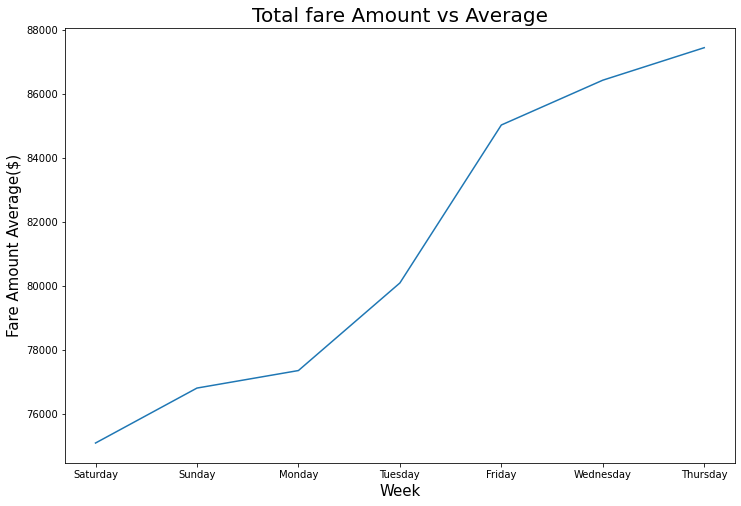

In [22]:
plt.figure(figsize = (12,8))
df.groupby("weekday_name")["amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

In [23]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

In [24]:
df["weekday_name"] = df["weekday_name"].map(week_names_encode)

In [25]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3


In [26]:
df["Hour"] = df["date_time_of_pickup"].dt.hour

In [27]:
df["Hour"].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5], dtype=int64)

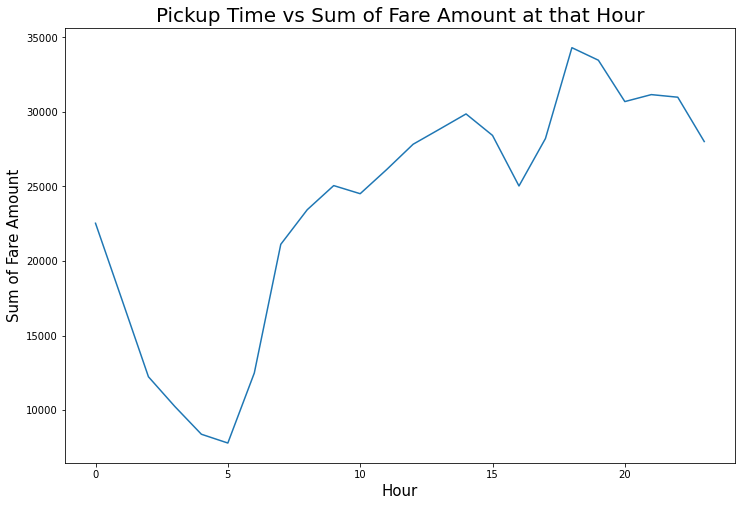

In [28]:
plt.figure(figsize = (12,8))

df.groupby("Hour")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()

In [29]:
df["Month_Day"] = df["date_time_of_pickup"].dt.day

In [30]:
for day in list(df["date_time_of_pickup"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(df[df.date_time_of_pickup.dt.day==day].amount.sum(), 2)}")

Date : 1 	 Total fare Amount : $17229.03
Date : 2 	 Total fare Amount : $17711.51
Date : 3 	 Total fare Amount : $17887.56
Date : 4 	 Total fare Amount : $16871.76
Date : 5 	 Total fare Amount : $18426.86
Date : 6 	 Total fare Amount : $18898.4
Date : 7 	 Total fare Amount : $19953.12
Date : 8 	 Total fare Amount : $19773.47
Date : 9 	 Total fare Amount : $19096.83
Date : 10 	 Total fare Amount : $19103.29
Date : 11 	 Total fare Amount : $18543.99
Date : 12 	 Total fare Amount : $20143.27
Date : 13 	 Total fare Amount : $19773.21
Date : 14 	 Total fare Amount : $18941.62
Date : 15 	 Total fare Amount : $19425.37
Date : 16 	 Total fare Amount : $19864.5
Date : 17 	 Total fare Amount : $19498.61
Date : 18 	 Total fare Amount : $19117.84
Date : 19 	 Total fare Amount : $19866.99
Date : 20 	 Total fare Amount : $18862.46
Date : 21 	 Total fare Amount : $20123.13
Date : 22 	 Total fare Amount : $18670.33
Date : 23 	 Total fare Amount : $18803.67
Date : 24 	 Total fare Amount : $18053.6
Date

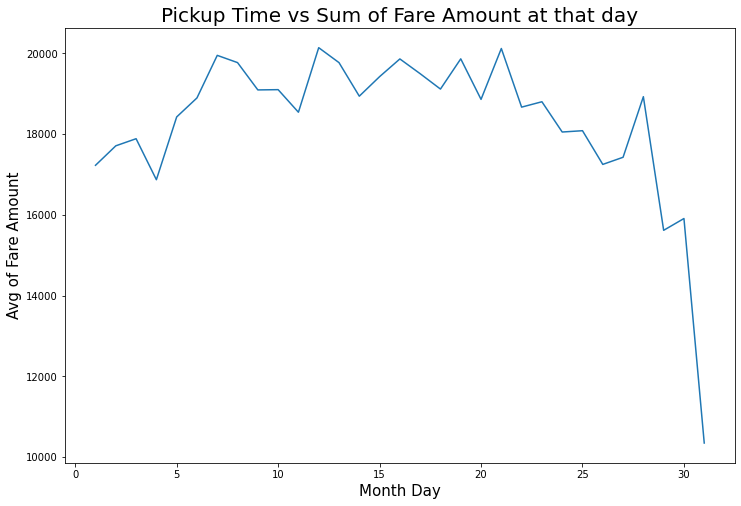

In [31]:
plt.figure(figsize = (12, 8))

df.groupby("Month_Day")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [32]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name,Hour,Month_Day
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9


In [33]:
df["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

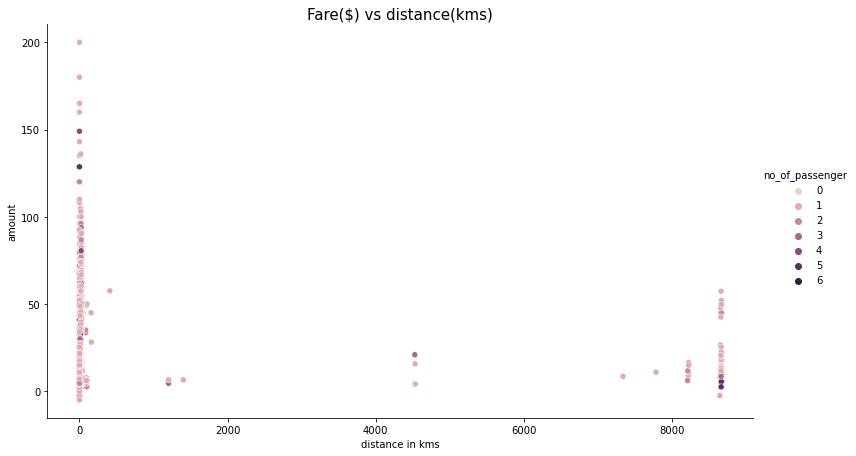

In [34]:
sns.relplot(data = df, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

In [35]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name,Hour,Month_Day
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9


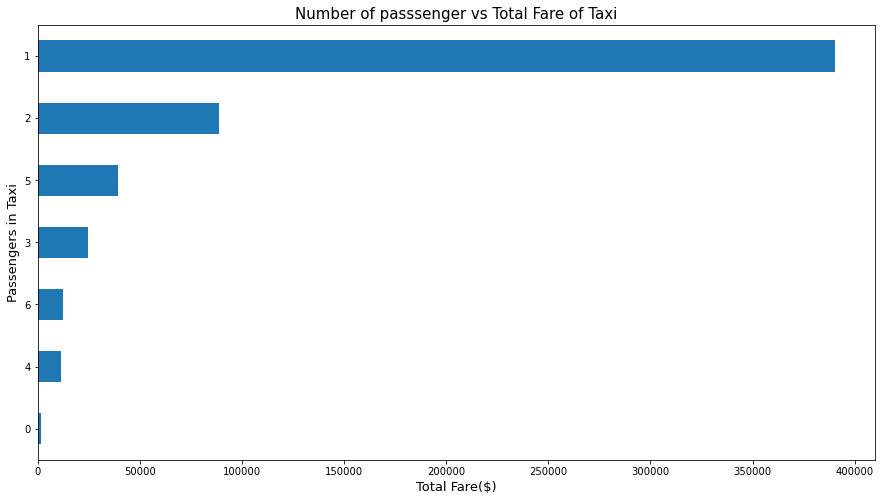

In [36]:
plt.figure(figsize=(15,8))
df.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [37]:
df = df.drop("date_time_of_pickup", axis = 1)

In [38]:
df.head()

,amount,no_of_passenger,distance in kms,weekday_name,Hour,Month_Day
0,4.5,1,0.41,1,17,15
1,16.9,1,4.63,3,16,5
2,5.7,2,1.00,6,0,18
3,7.7,1,0.91,5,4,21
4,5.3,1,1.36,3,7,9


array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'no_of_passenger'}>],
       [<AxesSubplot:title={'center':'distance in kms'}>,
        <AxesSubplot:title={'center':'weekday_name'}>],
       [<AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Month_Day'}>]], dtype=object)

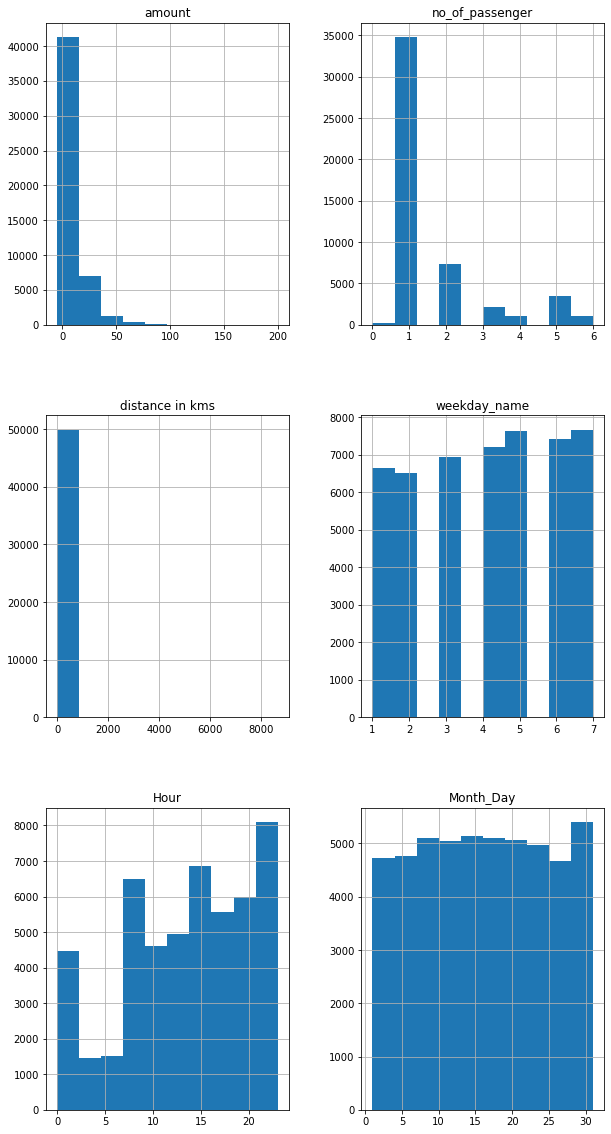

In [39]:
df.hist(figsize=(10,20))

In [40]:
df['no_of_passenger'] = df['no_of_passenger'].astype(float)

In [41]:
df.head()

,amount,no_of_passenger,distance in kms,weekday_name,Hour,Month_Day
0,4.5,1.0,0.41,1,17,15
1,16.9,1.0,4.63,3,16,5
2,5.7,2.0,1.00,6,0,18
3,7.7,1.0,0.91,5,4,21
4,5.3,1.0,1.36,3,7,9


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
y = df['amount']

In [44]:
X = df.drop('amount', axis = 1)

In [45]:
X.head(3)

,no_of_passenger,distance in kms,weekday_name,Hour,Month_Day
0,1.0,0.41,1,17,15
1,1.0,4.63,3,16,5
2,2.0,1.00,6,0,18


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [47]:
X_train.head()

,no_of_passenger,distance in kms,weekday_name,Hour,Month_Day
28968,1.0,2.64,6,9,7
5212,1.0,0.00,5,21,23
15495,1.0,19.20,2,18,24
29117,1.0,0.99,7,19,18
30795,1.0,0.73,1,9,12


In [48]:
y_train.head()

28968    12.00
5212     49.80
15495    49.57
29117     5.30
30795     7.50
Name: amount, dtype: float64

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
lr1 = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=3, min_samples_leaf=2,splitter='best')

In [51]:
lr1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_leaf=2)

In [52]:
lr1.score(X_test, y_test)

0.639290896296197

In [53]:
lr1.score(X_train, y_train)

0.6462468256337346

In [54]:
from sklearn.ensemble import BaggingRegressor

In [55]:
lr2 = BaggingRegressor(n_estimators=5, max_samples=0.01, max_features=1.0)

In [56]:
lr2.fit(X_train, y_train)

BaggingRegressor(max_samples=0.01, n_estimators=5)

In [57]:
lr2.score(X_test, y_test)

0.58326529915748

In [58]:
lr2.score(X_train, y_train)

0.5815456506713229

In [59]:
import warnings

In [60]:
warnings.filterwarnings("ignore")

In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [62]:
lr3 = AdaBoostRegressor(n_estimators=4, learning_rate=0.99)

In [63]:
lr3.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.99, n_estimators=4)

In [64]:
lr3.score(X_test, y_test)

0.5108599561552303

In [65]:
lr3.score(X_train, y_train)

0.5127555871329884

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
lr4 = RandomForestRegressor(n_estimators=10,min_samples_split=20,min_samples_leaf=1,min_impurity_decrease=0.9)

In [68]:
lr4.fit(X_train, y_train)

RandomForestRegressor(min_impurity_decrease=0.9, min_samples_split=20,
                      n_estimators=10)

In [69]:
lr4.score(X_test, y_test)

0.6448696165002861

In [70]:
lr4.score(X_train, y_train)

0.649555336377347